## 引入包

In [1]:
import matplotlib.pyplot as plt
import paddle
import paddle.nn.functional as F
from tqdm.notebook import tqdm
from visualdl import LogWriter

## 数据预处理

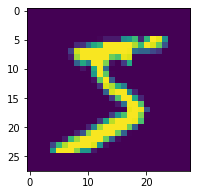

In [2]:
train_dataset = paddle.vision.datasets.MNIST(mode='train')

def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.show()

show_image(train_dataset[0][0])

## 模型&训练

In [3]:
visual_dl_writer = LogWriter(logdir="./visual_dl")


class Summer:
    def __init__(self):
        self.sum_num = 0.0
        self.sum_weight = 0.0

    @staticmethod
    def convert(n):
        from typing import Iterable
        if isinstance(n, Iterable):
            n = next(iter(n))
        return float(n)

    def add(self, num, weight=1.0):
        self.sum_num += self.convert(num)
        self.sum_weight += self.convert(weight)

    def __str__(self):
        return "{:.4f}".format(self.sum_num / self.sum_weight)


In [4]:
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=paddle.vision.transforms.ToTensor())
val_dataset = paddle.vision.datasets.MNIST(mode='test', transform=paddle.vision.transforms.ToTensor())

model = paddle.Model(paddle.vision.models.LeNet())
model.prepare(
    optimizer=paddle.optimizer.Adam(parameters=model.parameters()),
    loss=paddle.nn.CrossEntropyLoss(),
    metrics=[paddle.metric.Accuracy()]
)

model.fit(train_dataset,
          epochs=3,
          batch_size=64,
          verbose=1)

model.evaluate(val_dataset, verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/3


C:\Users\kun\AppData\Local\Programs\Python\Python39\lib\site-packages\paddle\fluid\layers\utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  return (isinstance(seq, collections.Sequence) and


step 938/938 [==============================] - loss: 0.0199 - acc: 0.9434 - 29ms/step          
Epoch 2/3
step 938/938 [==============================] - loss: 0.0134 - acc: 0.9777 - 23ms/step          
Epoch 3/3
step 938/938 [==============================] - loss: 0.0411 - acc: 0.9813 - 34ms/step          
Eval begin...
step 10000/10000 [==============================] - loss: 3.5643e-05 - acc: 0.9853 - 3ms/step          
Eval samples: 10000


{'loss': [3.564294e-05], 'acc': 0.9853}

In [5]:
batch_size = 32
train_loader = paddle.io.DataLoader(
    dataset=paddle.vision.datasets.MNIST(mode='train', transform=paddle.vision.transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True
)
test_loader = paddle.io.DataLoader(
    dataset=paddle.vision.datasets.MNIST(mode='test', transform=paddle.vision.transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=False
)
paddle.set_device('cpu')
model = paddle.vision.models.LeNet()
optimizer = paddle.optimizer.Adam(parameters=model.parameters())

tot_epoch = 3
for epoch in range(tot_epoch):

    def run(data_loader, colour='#1d3557', is_train=True):
        if is_train:
            model.train()
        else:
            model.eval()
        pbar = tqdm(iterable=enumerate(data_loader), total=len(data_loader), colour=colour)
        loss_summer = Summer()
        acc_summer = Summer()
        for batch_id, (data, labels) in pbar:
            images = data.astype(paddle.float32)
            y_hat = model(images)
            loss = F.cross_entropy(y_hat, labels)
            acc = paddle.metric.accuracy(y_hat, labels)
            loss_summer.add(loss)
            acc_summer.add(acc)
            if is_train:
                loss.backward()
                optimizer.step()
                optimizer.clear_grad()
            pbar.set_description(f'Epoch {epoch + 1}/{tot_epoch} T - '
                                 f'loss: {loss_summer} '
                                 f'acc: {acc_summer}')


    run(train_loader, '#1d3557', is_train=True)
    run(test_loader, '#457b9d', is_train=False)


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]